In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_ml = pd.read_csv("test3_llama3_multilingual_large.csv")
df_bl = pd.read_csv("test3_llama3_baai_large.csv")
df_mxl = pd.read_csv("test3_llama3_mxbai_large.csv")
df_bs = pd.read_csv("test3_llama3_baai_small.csv")

In [3]:
df_ml = df_ml.fillna(0, inplace=False)
df_bl = df_bl.fillna(0, inplace=False)
df_mxl = df_mxl.fillna(0, inplace=False)
df_bs = df_bs.fillna(0, inplace=False)

In [4]:
df_ml = df_ml.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_bl = df_bl.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_mxl = df_mxl.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])
df_bs = df_bs.drop(columns=["question", "answer", "contexts", "ground_truth", "faithfulness", "answer_relevancy"])

In [5]:
df_ml_mean = df_ml.mean()
df_bl_mean = df_bl.mean()
df_mxl_mean = df_mxl.mean()
df_bs_mean = df_bs.mean()
df_ml_mean

context_precision    0.962963
context_recall       0.944444
dtype: float64

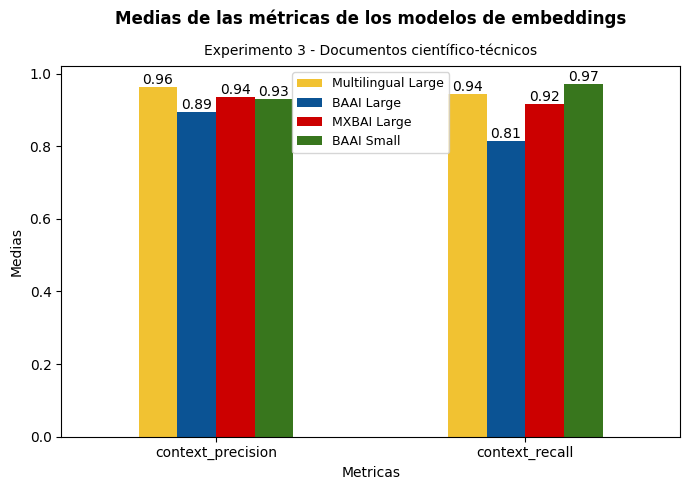

In [6]:
# Crear un DataFrame con todos los medios
means_df = pd.DataFrame({
    "Multilingual Large": df_ml_mean,
    "BAAI Large": df_bl_mean,
    "MXBAI Large": df_mxl_mean,
    "BAAI Small": df_bs_mean
})

colors = ["#f1c232", "#0b5394", "#cc0000", "#38761d"]

# Graficar el DataFrame
ax = means_df.plot(kind="bar", figsize=(7, 5), color=colors)

# Añadir etiquetas de valor en la parte superior de las barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge")

# Añadir etiquetas y título
plt.xlabel("Metricas")
plt.ylabel("Medias")
plt.title("Medias de las métricas de los modelos de embeddings", loc="center", pad=30, fontweight="bold")
ax.text(0.5, 1.03, "Experimento 3 - Documentos científico-técnicos", transform=ax.transAxes, fontsize=10, ha="center")
plt.xticks(rotation=0)
plt.legend(loc="upper center", prop={"size": 9})
plt.tight_layout()

# Guardar la gráfica
plt.savefig("experimento3_emb_medias.png")

# Mostrar la gráfica
plt.show()